In [2]:
import INS_Analysis as insd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/jac2462@uta.edu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [1]:
trials = '../../simulations/elemental_scan/gen/trials.csv'
trials = pd.read_csv(trials, index_col=0)
trials

In [4]:
spectrums = '../../simulations/elemental_scan/gen/spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y'][:, 0, :]
trials['spectrum'] = [s for s in spectrums]

In [5]:
trials['Si'] = [-i for i in trials['14000']]

In [6]:
point_slope_areas, point_slope_fits = insd.calcPeakAreas(
    bins, 
    spectrums[0], 
    returnFits=True,
    peakWindows={
                'Si1': [1.4, 2.2],
                'Si2C1': [4.2, 4.8],
            },
    baselineFunction='point_slope',
    )

In [7]:
ps_areas = []
ps_fits = []
ef_areas = []
ef_fits = []
ft_areas = []
ft_fits = []
for trial in trials.index:
    spectrum = trials.loc[trial, 'spectrum']
    ps_area, ps_fit = insd.calcPeakAreas(
        bins, 
        spectrum, 
        returnFits=True,
        peakWindows={
                    'Si1': [1.4, 2.2],
                    'Si2C1': [4.2, 4.8],
                },
        baselineFunction='point_slope',
        )
    ps_areas.append(ps_area)
    ps_fits.append(ps_fit)

    ef_area, ef_fit = insd.calcPeakAreas(
        bins, 
        spectrum, 
        returnFits=True,
        peakWindows={
                    'Si1': [1.4, 2.2],
                    'Si2C1': [4.2, 4.8],
                },
        baselineFunction='exp_falloff',
        )
    ef_areas.append(ef_area)
    ef_fits.append(ef_fit)

    ft_area, ft_fit = insd.calcPeakAreas(
        bins, 
        spectrum, 
        returnFits=True,
        peakWindows={
                    'Si1': [1.4, 2.2],
                    'Si2C1': [4.2, 4.8],
                },
        baselineFunction='fat_tail',
        )
    ft_areas.append(ft_area)
    ft_fits.append(ft_fit)

trials['ps_areas'] = ps_areas
trials['ps_fits'] = ps_fits
trials['ef_areas'] = ef_areas
trials['ef_fits'] = ef_fits
trials['ft_areas'] = ft_areas
trials['ft_fits'] = ft_fits

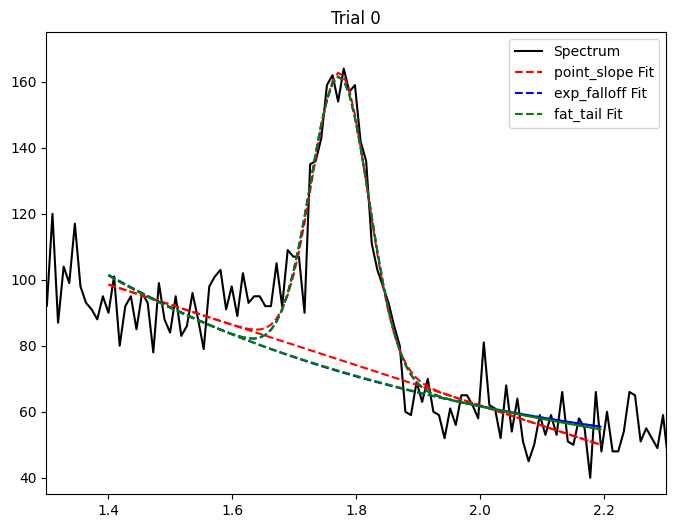

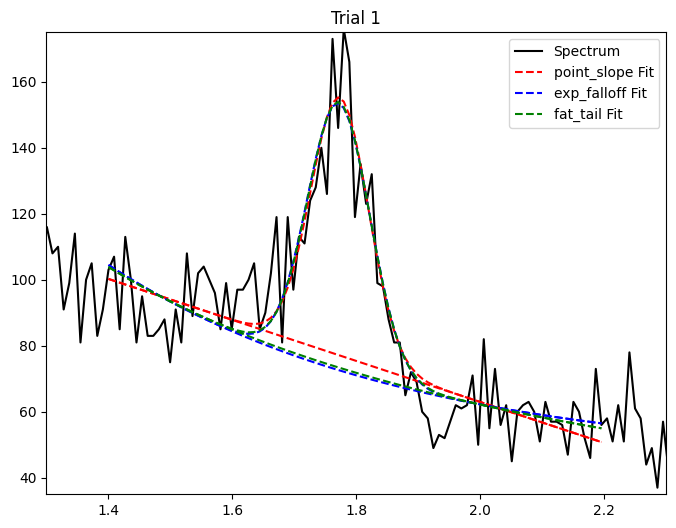

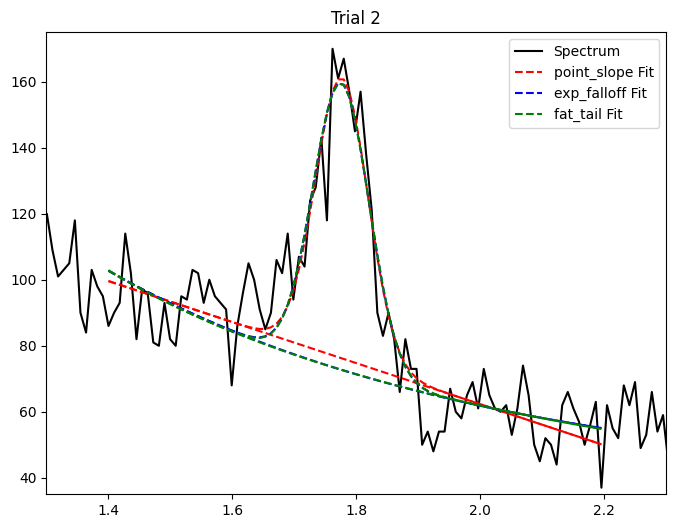

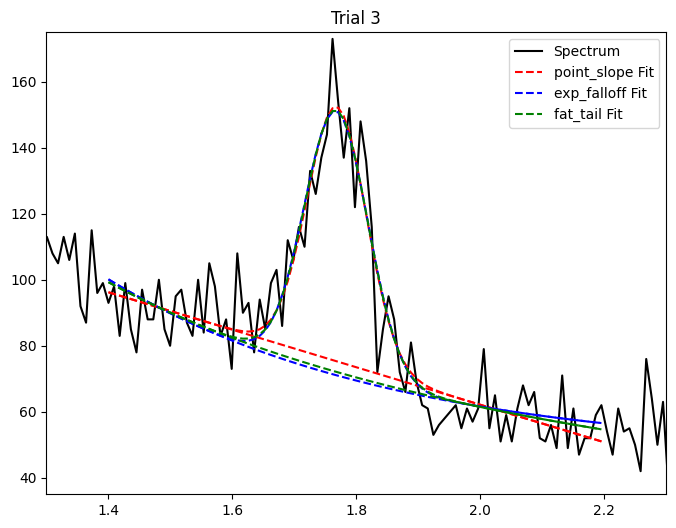

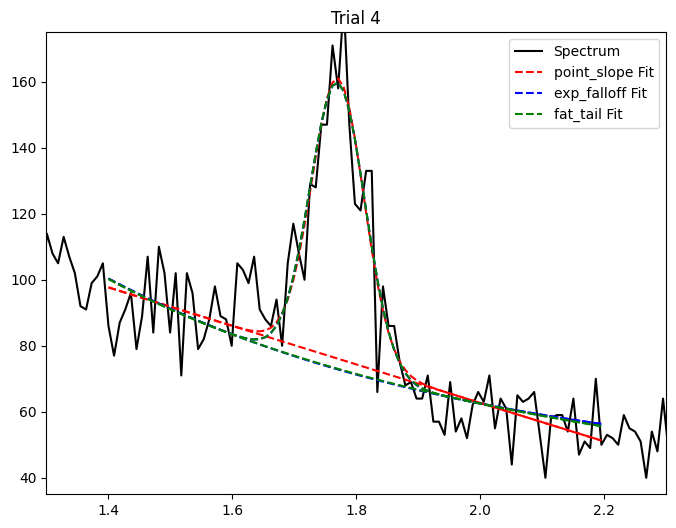

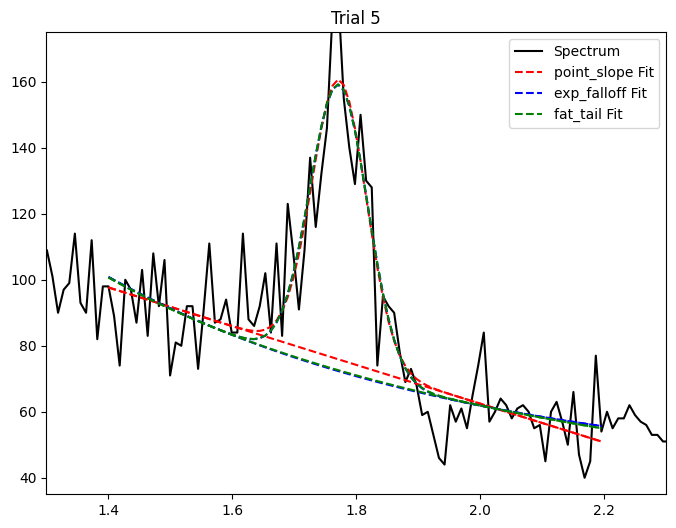

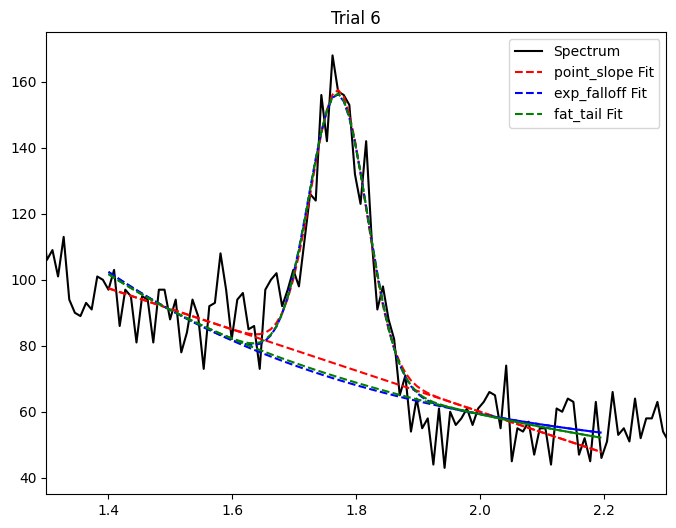

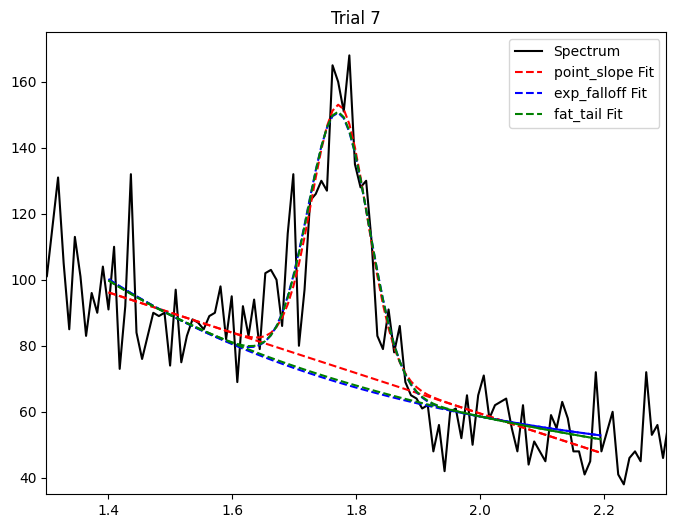

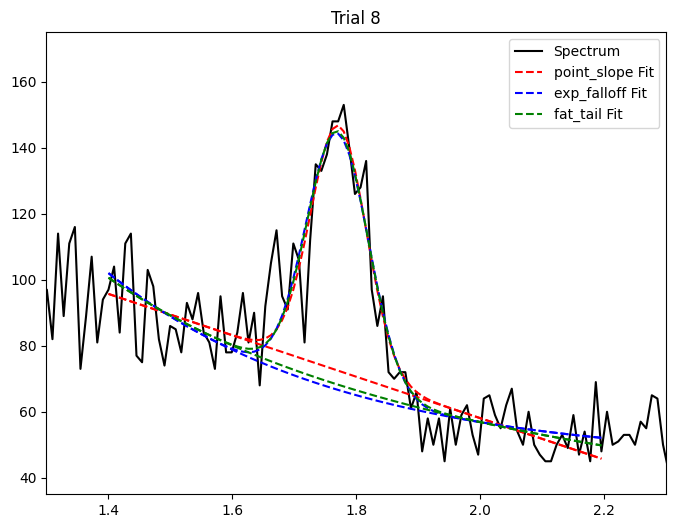

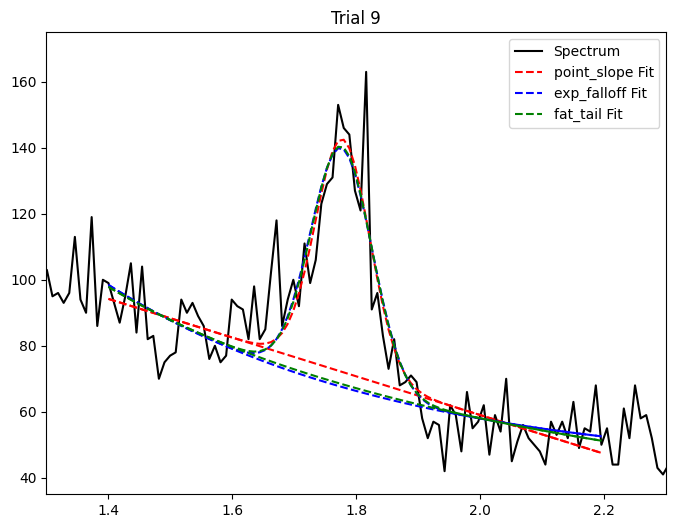

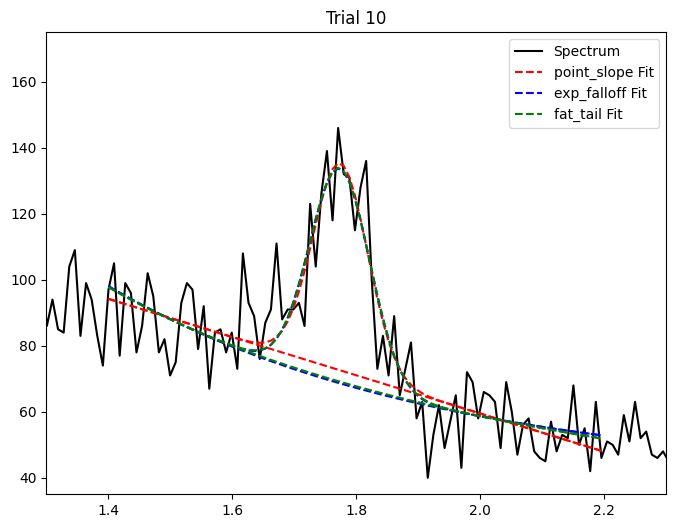

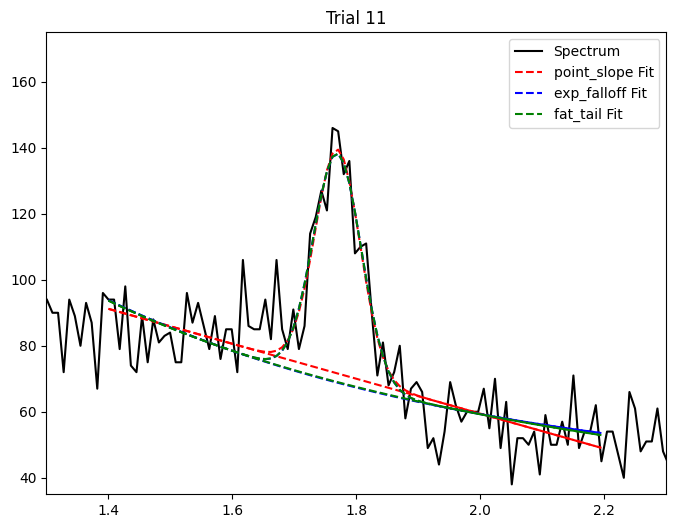

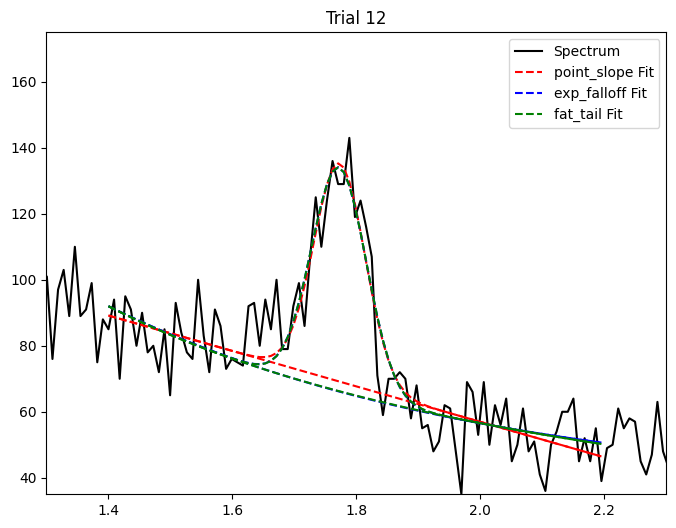

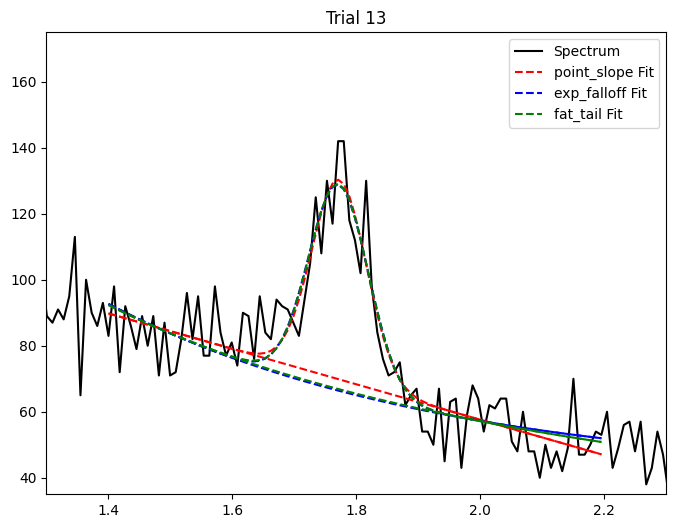

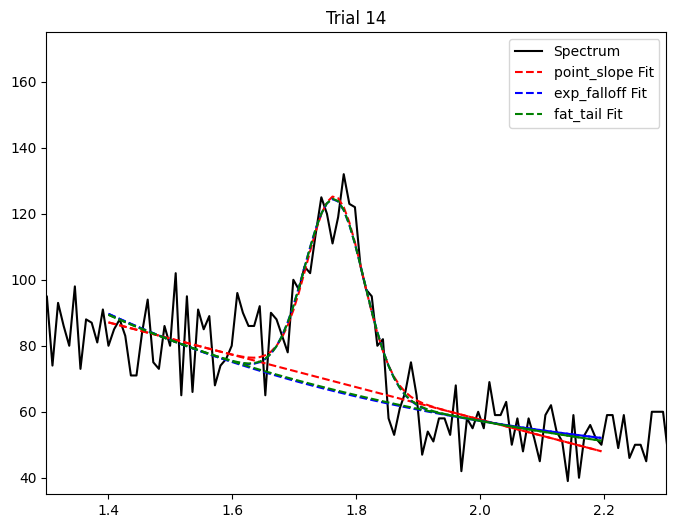

In [8]:
for trial in trials.index:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(bins, trials.loc[trial, 'spectrum'], label='Spectrum', color='black')
    ax.plot(trials.loc[trial, 'ps_fits']['Si1']['bins'], trials.loc[trial, 'ps_fits']['Si1']['baseline'], color='red', linestyle='--')
    ax.plot(trials.loc[trial, 'ps_fits']['Si1']['bins'], trials.loc[trial, 'ps_fits']['Si1']['peak'], label='point_slope Fit', color='red', linestyle='--')
    ax.plot(trials.loc[trial, 'ef_fits']['Si1']['bins'], trials.loc[trial, 'ef_fits']['Si1']['baseline'], color='blue', linestyle='--')
    ax.plot(trials.loc[trial, 'ef_fits']['Si1']['bins'], trials.loc[trial, 'ef_fits']['Si1']['peak'], label='exp_falloff Fit', color='blue', linestyle='--')
    ax.plot(trials.loc[trial, 'ft_fits']['Si1']['bins'], trials.loc[trial, 'ft_fits']['Si1']['baseline'], color='green', linestyle='--')
    ax.plot(trials.loc[trial, 'ft_fits']['Si1']['bins'], trials.loc[trial, 'ft_fits']['Si1']['peak'], label='fat_tail Fit', color='green', linestyle='--')
    ax.set_title(f'Trial {trial}')
    plt.xlim(1.3, 2.3)
    plt.ylim(35, 175)
    ax.legend()
    plt.show()

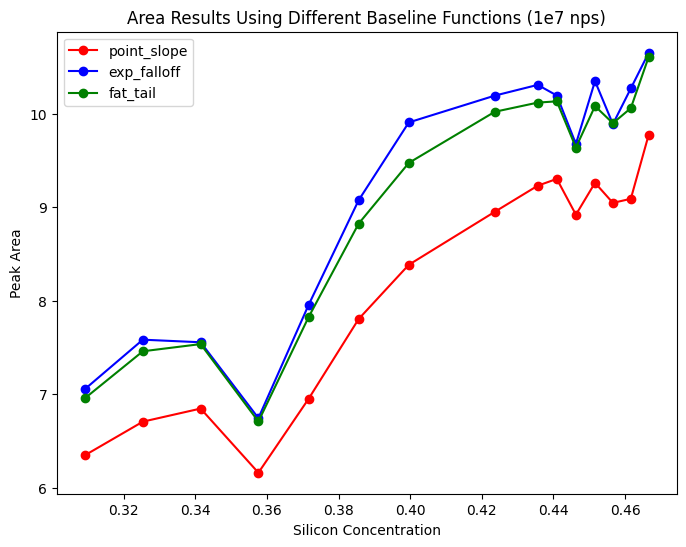

In [9]:
# graph the areas of each baseline function as the silicon concentration changes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(trials['Si'], trials['ps_areas'].apply(lambda x: x['Si1']), label='point_slope', color='red', marker='o')
ax.plot(trials['Si'], trials['ef_areas'].apply(lambda x: x['Si1']), label='exp_falloff', color='blue', marker='o')
ax.plot(trials['Si'], trials['ft_areas'].apply(lambda x: x['Si1']), label='fat_tail', color='green', marker='o')
ax.set_title('Area Results Using Different Baseline Functions (1e7 nps)')
ax.set_xlabel('Silicon Concentration')
ax.set_ylabel('Peak Area')
ax.legend()
plt.show()